# 파이프라인 구축 및 하이퍼파라미터 튜닝
- 머신러닝 절차 ( 전체 공정 5단계 내에서)
    - 알고리즘 선정
    - 학습, 테스트용 데이터 준비
    -학습 
        - 일차적인 기본 학습 진행
        - 운영 : 온라인 학습, 배치학습, 미니배치 학습 등등
            - 알고리즘을 주기적으로 교체(자동,반자동,수동)
            - 실시간으로 반영되면서 교체(실시간온라인, 주 단위로 특정일에 갱신)
            - 롤백이 가능
        - 예측 
        - 성능평가 
            - 목표치에 도달하기 위해) 정확도를 올린다, 손실값을 줄인다 등등
            - 판단 기준 : 분류, 회귀, 비지도학습, 강화학습 등등 각 기준에 따라 결과가 달라진다
            - **성능을 높이기 위해서) 파이프라인 구축, 교차검증, 하이퍼파라미터 튜닝**
                => *알고리즘 선정*
            - 성능평가 방법 : 분류, 회귀, 비지도학습, 강화학습 등등 각 기준에 따라 결과가 달라진다
                - 분류 : 혼동행렬(오차행렬), ROC 커브, AUC 값 등등 비교
                - 회귀 : 지표로 판단, 손실함수값(평균제곱근 오차값) 
            - 알고리즘 덤프(향후 시스템통합에 사용할 수 있게 구성) 
            

# 단일 알고리즘 적용하여 머신러닝 프로세스 진행 

In [95]:
# 1. 모듈 가져오기
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# 머신러닝 모델링 : 75(50(훈련):25(검증)):25
# 통계적 모델링 : 80:20

In [96]:
# 2. 데이터 확보, 수집 (생략, 제공된다)
cancer = load_breast_cancer()

In [97]:
# 3. 데이터 준비
# 데이터의 기초적인 정보, 통계정보를 살펴보고 기본 통찰을 획득
# 준비 -> 품질향상, 학습에 필요한 형태로 구성 
type(cancer), dir(cancer), print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

(sklearn.utils.Bunch,
 ['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names'],
 None)

In [98]:
# 데이터의 볼륨 : 데이터는 569개, 특성(독립변수)은 30개 
cancer.data.shape

(569, 30)

In [99]:
#종속변수, 암이냐 아니냐
cancer.target.shape, cancer.target[:5]

((569,), array([0, 0, 0, 0, 0]))

In [100]:
# '악성' : 0, '양성' : 1
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [101]:
# 4. 데이터 분석 (생략)

In [102]:
# 5. 예측 모델링 구축
# 데이터가 특성과 정답을 가지고 있으므로, 지도학습>분류 

In [103]:
import sklearn

In [104]:
sklearn.__version__ # 버전이 다르다 

'0.21.3'

In [105]:
# 5-1. 알고리즘 선정 (임의 선정)
clf = SVC()

In [106]:
# 5-2. 학습, 테스트용 데이터 준비 
# 독립변수와 종속변수의 데이터의 수는 일치, 차원은 1개 차이가 남 
# return : 훈련용 독립변수, 테스트용 독립변수, 훈련용 정답, 테스트용 정답 
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, # 독립변수, 30개 특성에 대한 개별값들, 2-ndarray
    cancer.target, # 종속변수, 악성(0), 양성(1), 1-ndarray
    random_state = 0, # 난수의 seed를 고정함으로써, 매번 돌릴 때마다 데이터가 섞이는 순서가 
                      # 동일하다 => 실험환경을 통제
                      # 사용하지 않으면 통상 현재시간을 seed로 사용
    test_size = 0.25 # 테스트 데이터는 25%를 책정한다. 사용하지 않아도 기본값이 0.25 
)

In [107]:
# 훈련 데이터가 테스트 데이터의 약 3배의 볼륨을 가진다 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((426, 30), (426,), (143, 30), (143,))

In [108]:
# 5-3. 학습시킨다, 이런 데이터에 대해 훈련되었다 
# clf : 분류기 - 분류 알고리즘(여기서 사용한 제품은 SVC)
clf.fit( X_train, y_train )

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [109]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [110]:
X_train.shape

(426, 30)

In [111]:
# 5-4. 예측해라. 한번도 접하지 않은 데이터를 
predict = clf.predict( X_test )
predict 
# 예측값은 0 아니면 1 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [112]:
# 5-5. 성능 평가를 수행 (분류, 회귀, 비지도, 강화 => 방법이 바뀐다)
# 분류 -> 혼동(오차)행렬 -> 정밀도, 재현율, 정확도, f1-score, AUC, ROC
# 정확도만 일단 살펴보겠다 
from sklearn import metrics 

# (실제 정답, 알고리즘이 예측한 값)
metrics.accuracy_score( y_test, predict )

0.6293706293706294

In [113]:
# 예측 후 평가를 바로 진행 
clf.score( X_test, y_test )

0.6293706293706294

# 정확도를 높이기 위해서 조치 

## 데이터의 양 추가(여기서는 불가)

## 데이터 품질 향상 (전처리기를 이용한 정규화 처리)

- 현재 정확도는 0.629% 이다
- 만약 현 site의 목표 임계치가 96%라면, 현 알고리즘을 개선,교체,데이터를 증설 등 조치가 필요하다 
- 추가 데이터 유입은 불가
- 품질 향상을 하는 방향으로 진행 -> 3단계 조치사항의 목표 
    - 전처리(preprocessing) => 정규화, 수치 조정 등등 진행 

In [ ]:
# 컬럼간 데이터의 편차가 비교적 크다()
# => 정규화를 통해서 0~1 사이로 구성, 최소값을 0, 최대값을 1로 둔다면
# MinMaxScaler
X_train[:2], X_train[-10]

In [115]:
from sklearn.preprocessing import MinMaxScaler 

In [116]:
scaler = MinMaxScaler().fit( X_train )
scaler 

MinMaxScaler(copy=True, feature_range=(0, 1))

In [117]:
# 스케일러를 통해서 변환
X_train_scaled = scaler.transform(X_train)
X_train_scaled 

array([[0.23044157, 0.32157676, 0.21940433, ..., 0.31484671, 0.30277942,
        0.09858323],
       [0.20062473, 0.42116183, 0.19452699, ..., 0.06965208, 0.34042973,
        0.06677161],
       [0.62232003, 0.76929461, 0.60403566, ..., 0.56079917, 0.19850187,
        0.07431457],
       ...,
       [0.11619102, 0.35726141, 0.11077327, ..., 0.17402687, 0.17524147,
        0.17263545],
       [0.12963226, 0.35311203, 0.11706171, ..., 0.        , 0.06780997,
        0.06919848],
       [0.21434995, 0.59004149, 0.21235575, ..., 0.33251808, 0.10782574,
        0.21172767]])

- 알고리즘을 새로 만들어서 새로운 데이터로 다시 절차 수행
    - 단, 스케일러 생성 시 사용했던 재료가 전체 데이터에 대한 부분이 아닌 
    - 훈련 데이터로만 만든 스케일러이기 때문에 테스트 데이터로는 적합하지 않음 
    - 스케일러 생성이나 적용시 시점의 조정이 필요 
    - 파이프라인으로 해결 가능 

In [119]:
# 5-1. 알고리즘 선정 (임의 선정)
clf2 = SVC()
# 5-2. 학습, 테스트용 데이터 준비 
# 단, 스케일러의 생성재료는 X_train 
X_test_scaled = scaler.transform( X_test )
# 5-3. 학습시킨다, 이런 데이터에 대해 훈련되었다 
clf2.fit(X_train_scaled, y_train)
# 5-4. 예측해라. 한번도 접하지 않은 데이터를
# 5-5. 성능 평가를 수행(분류, 회귀, 비지도, 강화 => 방법이 바뀐다)
clf2.score( X_test_scaled, y_test )

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.951048951048951

# 하이퍼파라미터 튜닝 적용
- 머신러닝 모형이 완성(알고리즘 선정 후)되고, 알고리즘 선정 간에 적용
- 매개변수 최적화를 통해서 예측 성능을 극대화한다 

## 관련 함수나 클래스 
- vaildation_curve : 단일 하이퍼 파라미터 최적화 도구 
- **GridSearchCV : 복수 개의 알고리즘의 하이퍼파라미터 최적화 도구**
- **ParameterGrid : 복수 개의 알고리즘의 하이퍼파라미터 최적화 도구**

In [120]:
from sklearn.model_selection import GridSearchCV

In [122]:
# SVC 알고리즘에 대한 파라미터 값 범주(어디서부터 어디까지 지정)
# 기본값을 센터에 두고 전후를 나열 
param_grid = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

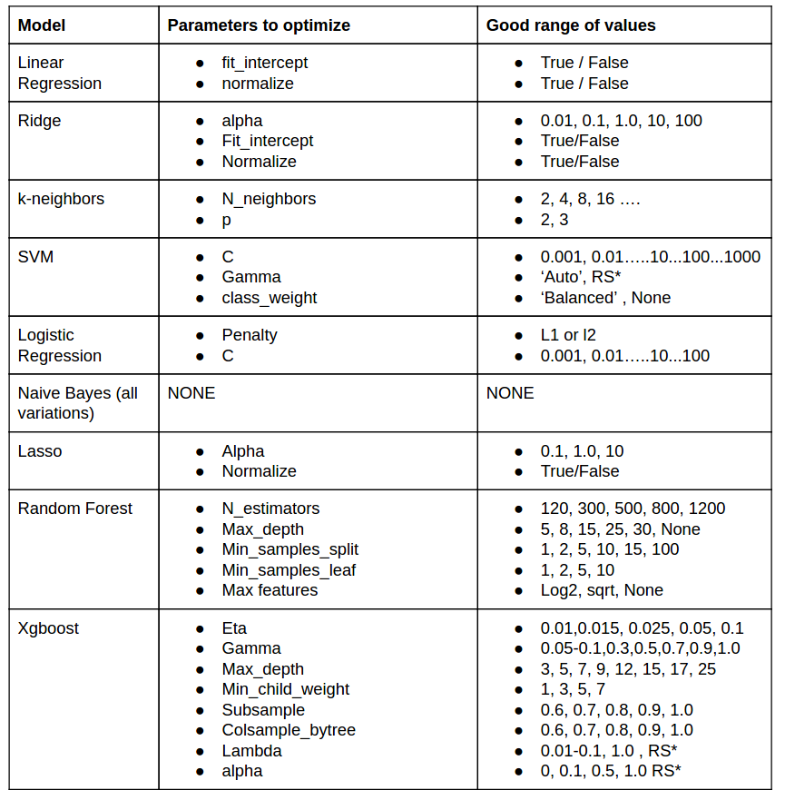

In [123]:
from IPython.display import Image
Image('./매개변수.png', width='500')
# 알고리즘 별 최적화파라미터 목록 및 값 샘플 

In [124]:
# 교차 검증을 통해서 파라미터 최적화 값을 확인
# cv : 교차 검증 수(폴드) 지정
# 예) cv=5 : 폴드 수가 5개, 즉 5세트를 지정한다. 이 중 한 세트가 검증용 데이터
grid = GridSearchCV( SVC(), param_grid, cv=5 )

In [125]:
# 훈련, 학습
grid.fit( X_train_scaled, y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [126]:
# 평가
grid.best_score_

0.9812206572769953

In [127]:
# 최적의 파라미터 조합은
grid.best_params_

{'C': 1, 'gamma': 1}

In [129]:
# 정확도
grid.score( X_test_scaled, y_test )
# 이전단계값 : 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]

0.972027972027972

- 왜 grid.best_score_가 점수가 더 높았을까? 

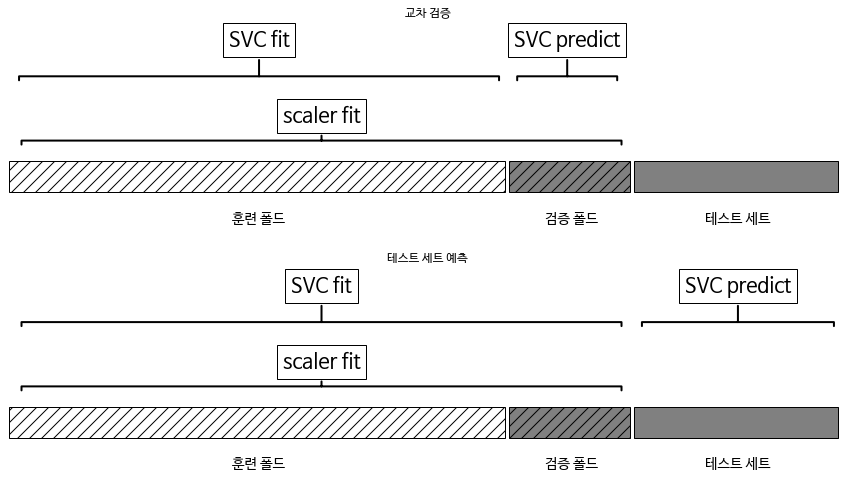

In [130]:
Image('./cro.png', width='500')
# 문제점
# 검증폴드의 데이터도 이미 사전에 스케일링이 된 것이기 때문에
# 스케일러 입장에서는 이미 접한 데이터가 됨
# 이로 인해 하이퍼파라미터 튜닝을 한다고 해도 -- C=1, gamma=1 이라는 결과(기본값)이 나옴
# -> 테스트 데이터 예측값이 이전과 동일하다 

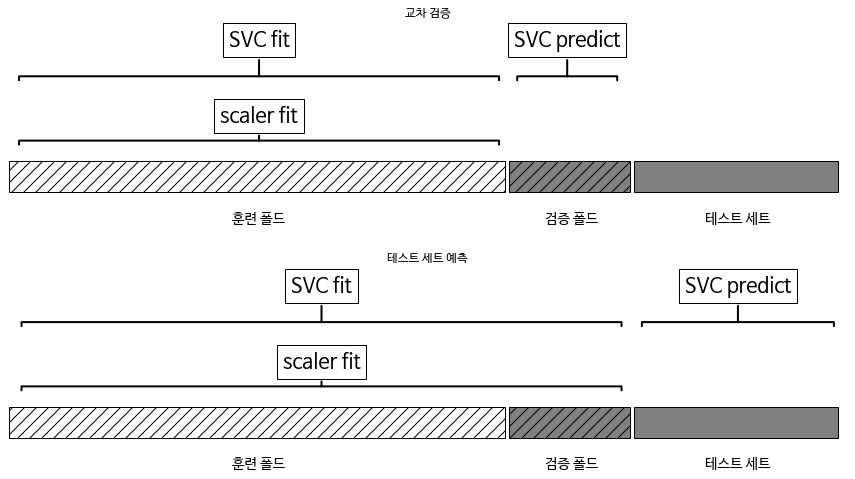

In [131]:
Image('./cro2.png', width='500')
# 그리드서치가 알아서 훈련시 훈련폴드인 스케일 처리를 하게끔 구성이 필요하다 
# => 파이프라인 

# 파이프라인 구축
- 폴드 문제 해결
- 여러 개 알고리즘 사용
- 하이퍼파라미터 튜닝 

In [133]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler 

In [134]:
# 생성 방법 비교 
# case 1 : 표준 방법 : 내가 이름을 직접 부여 
pipe_std1 = Pipeline( [ ('scaler', MinMaxScaler() ),
                      ('classfier', SVC() )
                      ])
# case2 : 약식, 간소화 방법 : 알아서 이름 부여 
# 이름은 대상 클래스를 다 소문자로 변환하여 부여 
pipe_std2 = make_pipeline( MinMaxScaler(), SVC( ))

In [136]:
pipe_std2

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

- 실제 적용 

In [137]:
# 파이프라인 구축 => 데이터 전처리, 훈련 등의 시퀀스를 정의
pipe = Pipeline( [ ('preprocessing', StandardScaler() ), 
                 ('classifier', SVC() )
                 ] )
# 하이퍼파라미터 튜닝
param_grid = [
              {
               'preprocessing':[StandardScaler(), MinMaxScaler()],
               'classifier' : [SVC()],
               'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
               'classifier__gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }, 
              {
               'preprocessing':[None],
               'classifier' : [RandomForestClassifier(n_estimators=100)],   
               'classifier__max_features' : [1,2,3] 
              }
]

In [138]:
# 교차 검증 생성
grid = GridSearchCV( pipe, param_grid, cv=5 )

In [139]:
y_train.shape

(426,)

In [140]:
# 훈련
grid.fit( X_train, y_train )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=Non...
                                                                min_impurity_decrease=0.0,

In [141]:
# 최적 파라미터
grid.best_params_

{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'classifier__C': 10,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [142]:
# 최고 점수
grid.best_score_

0.9859154929577465

In [143]:
# 예측 및 평가 
grid.score( X_test, y_test )

0.9790209790209791